# Boston
> Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

from GAparsimony import GAparsimony, Population, getFitness
from GAparsimony.util import linearModels_complexity

In [2]:
boston = load_boston()
X, y = boston.data, boston.target 
X = StandardScaler().fit_transform(X)

In [3]:
rerank_error = 0.01

params = {"alpha":{"range": (1., 25.9), "type": Population.FLOAT}, 
            "tol":{"range": (0.0001,0.9999), "type": Population.FLOAT}}

In [4]:
fitness = getFitness(Lasso, mean_squared_error, linearModels_complexity, minimize=True, test_size=0.2, random_state=42, n_jobs=-1)

In [5]:
GAparsimony_model = GAparsimony(fitness=fitness,
                                params = params, 
                                features = boston.feature_names,
                                keep_history = True,
                                rerank_error = rerank_error,
                                popSize = 40,
                                maxiter = 50, early_stop=10,
                                feat_thres=0.90, # Perc selected features in first generation
                                feat_mut_thres=0.10, # Prob of a feature to be one in mutation
                                seed_ini = 1234)

In [6]:
GAparsimony_model.fit(X, y)

GA-PARSIMONY | iter = 0
 MeanVal = -79.1715225 | ValBest = -30.3297649 | TstBest = -29.2466835 |ComplexBest = 13000000021.927263| Time(min) = 0.0904806  

GA-PARSIMONY | iter = 1
 MeanVal = -55.1072918 | ValBest = -30.3251321 | TstBest = -29.2267507 |ComplexBest = 12000000022.088743| Time(min) = 0.0460212  

GA-PARSIMONY | iter = 2
 MeanVal = -34.9396425 | ValBest = -30.3166673 | TstBest = -28.8701544 |ComplexBest = 10000000021.774683| Time(min) = 0.0415274  

GA-PARSIMONY | iter = 3
 MeanVal = -38.6590874 |  ValBest = -30.144799 |  TstBest = -29.321512 |ComplexBest = 11000000022.865057| Time(min) = 0.0379235  

GA-PARSIMONY | iter = 4
 MeanVal = -38.1919577 | ValBest = -30.1338488 | TstBest = -29.0883137 |ComplexBest = 11000000022.376043| Time(min) = 0.0446023  

GA-PARSIMONY | iter = 5
 MeanVal = -37.1190834 |  ValBest = -29.928764 | TstBest = -29.0395713 |ComplexBest = 8000000022.420581| Time(min) = 0.0415266  

GA-PARSIMONY | iter = 6
 MeanVal = -33.4552124 |  ValBest = -29.928764 

In [7]:
GAparsimony_model.summary()

+------------------------------------+
|             GA-PARSIMONY           |
+------------------------------------+

GA-PARSIMONY settings:
 Number of Parameters      = 2
 Number of Features        = 13
 Population size           = 40
 Maximum of generations    = 50
 Number of early-stop gen. = 10
 Elitism                   = 8
 Crossover probability     = 0.8
 Mutation probability      = 0.1
 Max diff(error) to ReRank = 0.01
 Perc. of 1s in first popu.= 0.9
 Prob. to be 1 in mutation = 0.1

 Search domain = 
           alpha     tol  CRIM   ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  \
Min_param    1.0  0.0001   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Max_param   25.9  0.9999   1.0  1.0    1.0   1.0  1.0  1.0  1.0  1.0  1.0   

           TAX  PTRATIO    B  LSTAT  
Min_param  0.0      0.0  0.0    0.0  
Max_param  1.0      1.0  1.0    1.0  


GA-PARSIMONY results:
 Iterations                = 25
 Best validation score = -29.634144915265725


Solution with the best validation s

In [8]:
GAparsimony_model.importance()

+--------------------------------------------+
|                  GA-PARSIMONY              |
+--------------------------------------------+

Percentage of appearance of each feature in elitists: 

  PTRATIO  LSTAT     RM      B        AGE       CHAS        NOX   CRIM  \
0   100.0  100.0  100.0  100.0  93.229167  48.958333  48.958333  43.75   

       ZN      DIS        RAD      INDUS       TAX  
0  28.125  26.5625  13.541667  13.020833  8.333333  


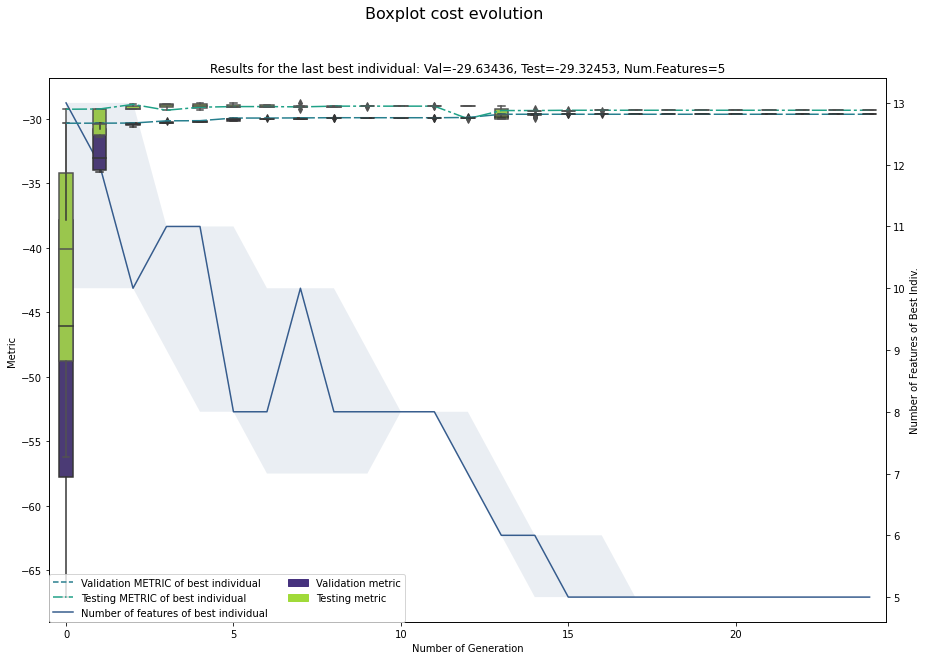

In [9]:
GAparsimony_model.plot(size_plot=(15,10))